In [55]:
import pandas as pd
df=pd.read_csv(r"C:\Users\polpi\Desktop\data science\project\project_1\EDA1\dfna2.csv")
df

,Name,Age,Qualification,Subject Area,Place of Education,Coding Language,Spoken Language,Skill Set,Years of Work Experience,Keyword_Category,words,chars
0,Anil Kumar,NaN,BTECH,ENGINEERING,"Velagapudi Siddhartha Engineering College, Vij...",SQL,NaN,SQL SQL MICROSOFT BUSINESS INTELLIGENCE MSBI T...,2.40,SQL Developer,20,135
1,Aradhana Tripathi,NaN,MCA,"COMPUTER, TECHNOLOGY","AKS University, IIIT Bangalore","SAS, SQL, PYTHON",NaN,SQL SAS PYTHON SQL SERVER SQL AWS RDS ATHENA M...,7.00,SQL Developer,12,66
2,Buddha Vamsi,29.0,BTECH,"SCIENCE, COMPUTER",JNTUK University,"JAVA, PYTHON","English, Telugu",DATABASE ENGINEER WITH EXPERIENCE SQL PLSQL VA...,2.11,Workday,50,380
3,ChinnaSubbarayuduM,NaN,BSC,COMPUTER,"Yogi Vemana University,Kadapa.","SHELL, SQL, XML",Indian,CHINNA SUBBARAYUDU HAS SKILLS WORKDAY HCM AND ...,5.10,SQL Developer,47,352
4,Gopi Krishna,30.0,BTECH,ENGINEERING,JNTU K University,"XML, XSLT","English, Telugu, Kannada",WORKDAY HCM REPORTING AND INTEGRATIONS XML XSL...,3.00,Workday,33,254
...,...,...,...,...,...,...,...,...,...,...,...,...
74,SSKumar,NaN,MCA,"SCIENCE, ENGINEERING, COMPUTER","Bharath University, Chennai","XML, PEOPLECODE, XSLT",NaN,PROFICIENT XML XSLT SOAP WEB SERVICES WORKDAY ...,6.00,Workday,54,405
75,Tatikonda Kiran Kumar,29.0,MCA,"SCIENCE, COMPUTER",SV University,SQL,"English, Telugu",MICROSOFT SQL SERVER DEVELOPMENT CODING LANGUA...,3.20,SQL Developer,13,101
76,Venkateswarlu B Hexaware,31.0,BTECH,TECHNOLOGY,JNTUH,"XML, XSLT",NaN,WORKDAY HCM WORKDAY ADVANCED REPORT WRITER COR...,7.00,Workday,39,287
77,Vinay Kumar,28.0,MBA,UNKNOWN,Narayana Engineering College,"XML, XSLT",NaN,WORKDAY SKILLS REPORTS STUDIO WORKDAY BUSINESS...,4.20,Workday,20,157


In [56]:
x=df.drop(columns=['Name', 'Age', 'Place of Education','Spoken Language', 'words', 'chars'], axis=1)
x=x.dropna()
x

,Qualification,Subject Area,Coding Language,Skill Set,Years of Work Experience,Keyword_Category
0,BTECH,ENGINEERING,SQL,SQL SQL MICROSOFT BUSINESS INTELLIGENCE MSBI T...,2.40,SQL Developer
1,MCA,"COMPUTER, TECHNOLOGY","SAS, SQL, PYTHON",SQL SAS PYTHON SQL SERVER SQL AWS RDS ATHENA M...,7.00,SQL Developer
2,BTECH,"SCIENCE, COMPUTER","JAVA, PYTHON",DATABASE ENGINEER WITH EXPERIENCE SQL PLSQL VA...,2.11,Workday
3,BSC,COMPUTER,"SHELL, SQL, XML",CHINNA SUBBARAYUDU HAS SKILLS WORKDAY HCM AND ...,5.10,SQL Developer
4,BTECH,ENGINEERING,"XML, XSLT",WORKDAY HCM REPORTING AND INTEGRATIONS XML XSL...,3.00,Workday
...,...,...,...,...,...,...
74,MCA,"SCIENCE, ENGINEERING, COMPUTER","XML, PEOPLECODE, XSLT",PROFICIENT XML XSLT SOAP WEB SERVICES WORKDAY ...,6.00,Workday
75,MCA,"SCIENCE, COMPUTER",SQL,MICROSOFT SQL SERVER DEVELOPMENT CODING LANGUA...,3.20,SQL Developer
76,BTECH,TECHNOLOGY,"XML, XSLT",WORKDAY HCM WORKDAY ADVANCED REPORT WRITER COR...,7.00,Workday
77,MBA,UNKNOWN,"XML, XSLT",WORKDAY SKILLS REPORTS STUDIO WORKDAY BUSINESS...,4.20,Workday


In [57]:
import sklearn
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
x['Qualification']=lb.fit_transform(x['Qualification'])
x['Subject Area']=lb.fit_transform(x['Subject Area'])
x['Coding Language']=lb.fit_transform(x['Coding Language'])
x['Keyword_Category']=lb.fit_transform(x['Keyword_Category'])
y=x['Keyword_Category']
x=x.drop(columns=['Keyword_Category'], axis=1)
x['Skill Set']=x['Skill Set'].values

In [58]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test=tts(x,y,test_size=0.2,random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((63, 5), (16, 5), (63,), (16,))

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vector = TfidfVectorizer(sublinear_tf=True, stop_words='english')

text_col = "Skill Set"
numeric_col = ["Years of Work Experience", "Qualification", "Subject Area", "Coding Language"]

x_train_text = tf_vector.fit_transform(x_train[text_col])
x_test_text = tf_vector.transform(x_test[text_col])

x_train_numeric = x_train[numeric_col]
x_test_numeric = x_test[numeric_col]

print(x_train_text.shape)
print(x_test_text.shape)

(63, 623)
(16, 623)


In [60]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from scipy.sparse import hstack
x_train_combined = hstack([x_train_text, x_train_numeric])
x_test_combined = hstack([x_test_text, x_test_numeric])

model_RF = RandomForestClassifier(random_state=42)
model_RF.fit(x_train_combined, y_train)
y_pred_RF=model_RF.predict(x_test_combined)

In [85]:
accuracy_rf = accuracy_score(y_test, y_pred_RF)
precision_rf = precision_score(y_test, y_pred_RF, average='weighted')
recall_rf = recall_score(y_test, y_pred_RF, average='weighted')
f1_rf = f1_score(y_test, y_pred_RF, average='weighted')
trainacc_rf=model_RF.score(x_train_combined, y_train)

print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"training accuracy: {trainacc_rf:.4f}")

Accuracy: 0.8125
Precision: 0.8594
Recall: 0.8125
F1-Score: 0.7999
training accuracy: 1.0000


In [62]:
from sklearn.neighbors import KNeighborsClassifier
best_param={'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
knn_model = KNeighborsClassifier(**best_param)
knn_model.fit(x_train_combined, y_train)
y_pred_knn=knn_model.predict(x_test_combined)

In [86]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
trainacc_knn=knn_model.score(x_train_combined, y_train)
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1-Score: {f1_knn:.4f}")
print(f"training accuracy: {trainacc_knn:.4f}")

Accuracy: 0.6250
Precision: 0.6750
Recall: 0.6250
F1-Score: 0.6194
training accuracy: 0.8889


In [10]:
print("Hyperparameters can be found using GridsearchCV")
from sklearn.model_selection import GridSearchCV
# Define the parameter grid to search over
param_grid = {
    'n_neighbors': [3, 5, 11, 21, 31, 41],  # Testing various odd numbers for n_neighbors
    'weights': ['uniform', 'distance'],  # 'uniform' means all neighbors have equal weight, 'distance' weights closer neighbors more
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Different distance metrics
    'leaf_size': [10, 20, 30, 40],  # Leaf size for k-d tree algorithm
}

knn_model = KNeighborsClassifier()

grid_search = GridSearchCV(knn_model, param_grid, cv=3, n_jobs=-1, verbose=1)

grid_search.fit(x_train_combined, y_train)

print("Best parameters for KNN:", grid_search.best_params_)

best_knn_model = grid_search.best_estimator_

y_pred_knn = best_knn_model.predict(x_test_combined)

Hyperparameters can be found using GridsearchCV
Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best parameters for KNN: {'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}


In [11]:
from sklearn.naive_bayes import MultinomialNB

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0],  # Smoothing parameter for Naive Bayes
    'fit_prior': [True, False],  # Whether to learn class prior probabilities
    'class_prior': [None, [0.5, 0.5]],  # Prior probabilities of the classes (set to None to learn from data)
}
model_nb=MultinomialNB()
grid_search = GridSearchCV(model_nb, param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(x_train_combined, y_train)

print("Best parameters for Naive Bayes:", grid_search.best_params_)
best_model_nb = grid_search.best_estimator_

y_pred_nb = best_model_nb.predict(x_test_combined)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for Naive Bayes: {'alpha': 0.001, 'class_prior': None, 'fit_prior': False}


c:\Users\polpi\anaconda3\envs\my_new_env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
24 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\polpi\anaconda3\envs\my_new_env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\polpi\anaconda3\envs\my_new_env\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\polpi\anaconda3\envs\my_new_env\lib\site-packages\sklearn\naive_bayes.py", line 775, in fit
    self._up

In [88]:
from sklearn.naive_bayes import MultinomialNB
best_param_nb={'alpha': 0.001, 'class_prior': None, 'fit_prior': False}
model_nb_best = MultinomialNB(**best_param_nb)
model_nb_best.fit(x_train_combined, y_train)
y_pred_nb=model_nb_best.predict(x_test_combined)

In [89]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')
trainacc_nb=model_nb_best.score(x_train_combined, y_train)
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1-Score: {f1_nb:.4f}")
print(f"training accuracy: {trainacc_nb:.4f}")

Accuracy: 0.8125
Precision: 0.8490
Recall: 0.8125
F1-Score: 0.8076
training accuracy: 1.0000


In [14]:
import lightgbm as lgbm

In [66]:
best_params_lgbm={'learning_rate': 0.01, 'max_depth': -1, 'min_child_samples': 10, 'n_estimators': 200, 'num_leaves': 31}
model_lgbm=lgbm.LGBMClassifier(**best_params_lgbm)
model_lgbm.fit(x_train_combined,y_train)
y_pred_lgbm=model_lgbm.predict(x_test_combined)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000232 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 258
[LightGBM] [Info] Number of data points in the train set: 63, number of used features: 38
[LightGBM] [Info] Start training from score -1.658228
[LightGBM] [Info] Start training from score -1.198696
[LightGBM] [Info] Start training from score -1.504077
[LightGBM] [Info] Start training from score -1.252763
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

c:\Users\polpi\anaconda3\envs\my_new_env\lib\site-packages\lightgbm\basic.py:1218: UserWarning: Converting data to scipy sparse matrix.
  _log_warning("Converting data to scipy sparse matrix.")


In [67]:
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
precision_lgbm = precision_score(y_test, y_pred_lgbm, average='weighted')
recall_lgbm = recall_score(y_test, y_pred_lgbm, average='weighted')
f1_lgbm = f1_score(y_test, y_pred_lgbm, average='weighted')

print(f"Accuracy: {accuracy_lgbm:.4f}")
print(f"Precision: {precision_lgbm:.4f}")
print(f"Recall: {recall_lgbm:.4f}")
print(f"F1-Score: {f1_lgbm:.4f}")

Accuracy: 0.8750
Precision: 0.8996
Recall: 0.8750
F1-Score: 0.8662


In [68]:
import xgboost
from xgboost import XGBClassifier
best_param_xgb= {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
model_xgb = XGBClassifier(**best_param_xgb)
model_xgb.fit(x_train_combined,y_train)
y_pred_xgb=model_xgb.predict(x_test_combined)

In [69]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")

Accuracy: 0.8750
Precision: 0.8996
Recall: 0.8750
F1-Score: 0.8662


In [70]:
from sklearn.linear_model import LogisticRegression
best_param_lr={'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
model_lr = LogisticRegression(**best_param_lr)
model_lr.fit(x_train_combined,y_train)
y_pred_lr=model_lr.predict(x_test_combined)

In [71]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-Score: {f1_lr:.4f}")

Accuracy: 0.8750
Precision: 0.8996
Recall: 0.8750
F1-Score: 0.8662


In [72]:
from sklearn.svm import SVC
best_param_svm={'C': 10, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
model_svm = SVC(**best_param_svm)
model_svm.fit(x_train_combined,y_train)
y_pred_svm=model_svm.predict(x_test_combined)

In [73]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1-Score: {f1_svm:.4f}")

Accuracy: 0.6250
Precision: 0.6438
Recall: 0.6250
F1-Score: 0.6128


In [24]:
param_grid = {
    'num_leaves': [31, 50, 70],          # Number of leaves in a tree
    'learning_rate': [0.01, 0.05, 0.1], # Step size shrinkage used in update
    'n_estimators': [100, 200, 300],    # Number of boosting iterations
    'max_depth': [-1, 10, 20],          # Maximum tree depth
    'min_child_samples': [10, 20, 30],  # Minimum number of data points in a leaf
}
model_lgbm=lgbm.LGBMClassifier()
grid_search = GridSearchCV(model_lgbm, param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(x_train_combined, y_train)

print("Best parameters for LightGBM:", grid_search.best_params_)
best_model_lgbm = grid_search.best_estimator_

y_pred_lgbm = best_model_lgbm.predict(x_test_combined)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 258
[LightGBM] [Info] Number of data points in the train set: 63, number of used features: 38
[LightGBM] [Info] Start training from score -1.658228
[LightGBM] [Info] Start training from score -1.198696
[LightGBM] [Info] Start training from score -1.504077
[LightGBM] [Info] Start training from score -1.252763
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

c:\Users\polpi\anaconda3\envs\my_new_env\lib\site-packages\lightgbm\basic.py:1218: UserWarning: Converting data to scipy sparse matrix.
  _log_warning("Converting data to scipy sparse matrix.")


In [27]:
param_grid = {
    'n_estimators': [100, 200, 300],       # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],    # Step size shrinkage
    'max_depth': [3, 6, 10],              # Maximum depth of a tree
    'subsample': [0.8, 1.0],              # Fraction of samples used for training each tree
    'colsample_bytree': [0.8, 1.0],       # Fraction of features used for each tree
}
model_xgb=XGBClassifier()
grid_search = GridSearchCV(model_xgb, param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(x_train_combined, y_train)

print("Best parameters for LightGBM:", grid_search.best_params_)
best_model_xgb = grid_search.best_estimator_

y_pred_xgb = best_model_xgb.predict(x_test_combined)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters for LightGBM: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


In [31]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization type
    'C': [0.01, 0.1, 1, 10],                       # Regularization strength (inverse of lambda)
    'solver': ['liblinear', 'saga'],               # Optimization solvers
    'max_iter': [100, 200, 500],                   # Maximum number of iterations for convergence
}
model_lr = LogisticRegression()
grid_search = GridSearchCV(model_lr, param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(x_train_combined, y_train)

print("Best parameters for Logistic Regression:", grid_search.best_params_)
best_model_lr = grid_search.best_estimator_

y_pred_lr = best_model_lr.predict(x_test_combined)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for Logistic Regression: {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


c:\Users\polpi\anaconda3\envs\my_new_env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
108 fits failed out of a total of 288.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\polpi\anaconda3\envs\my_new_env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\polpi\anaconda3\envs\my_new_env\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\polpi\anaconda3\envs\my_new_env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fi

In [34]:
param_grid = {
    'C': [0.1, 1, 10, 100],              # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'], # Specifies the kernel type to be used
    'degree': [2, 3, 4],                 # Degree of the polynomial kernel function (only for `poly` kernel)
    'gamma': ['scale', 'auto'],          # Kernel coefficient for `rbf`, `poly`, and `sigmoid`
}
model_svm = SVC()
grid_search = GridSearchCV(model_svm, param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(x_train_combined, y_train)

print("Best parameters for SVM:", grid_search.best_params_)
best_model_svm = grid_search.best_estimator_

y_pred_svm = best_model_svm.predict(x_test_combined)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters for SVM: {'C': 10, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}


In [74]:
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier()
model_dt.fit(x_train_combined,y_train)
y_pred_dt=model_dt.predict(x_test_combined)


In [75]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-Score: {f1_dt:.4f}")

Accuracy: 0.6250
Precision: 0.7094
Recall: 0.6250
F1-Score: 0.6413


In [76]:
from sklearn.ensemble import BaggingClassifier
best_param_bg={'bootstrap': True, 'bootstrap_features': True, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 10}
model_bg=BaggingClassifier(**best_param_bg)
model_bg.fit(x_train_combined,y_train)
y_pred_bg=model_bg.predict(x_test_combined)

In [77]:
accuracy_bg = accuracy_score(y_test, y_pred_bg)
precision_bg = precision_score(y_test, y_pred_bg, average='weighted')
recall_bg = recall_score(y_test, y_pred_bg, average='weighted')
f1_bg = f1_score(y_test, y_pred_bg, average='weighted')

print(f"Accuracy: {accuracy_bg:.4f}")
print(f"Precision: {precision_bg:.4f}")
print(f"Recall: {recall_bg:.4f}")
print(f"F1-Score: {f1_bg:.4f}")

Accuracy: 0.8750
Precision: 0.8996
Recall: 0.8750
F1-Score: 0.8662


In [42]:
param_grid = {
    'n_estimators': [10, 50, 100],      # Number of base estimators
    'max_samples': [0.5, 0.7, 1.0],    # Fraction of samples to draw from X for training each base estimator
    'max_features': [0.5, 0.7, 1.0],   # Fraction of features to draw from X for training each base estimator
    'bootstrap': [True, False],        # Whether samples are drawn with replacement
    'bootstrap_features': [True, False], # Whether features are drawn with replacement
}
model_bg = BaggingClassifier()
grid_search = GridSearchCV(model_bg, param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(x_train_combined, y_train)

print("Best parameters for Bagging Classifier:", grid_search.best_params_)
best_model_bg = grid_search.best_estimator_

y_pred_bg = best_model_bg.predict(x_test_combined)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters for Bagging Classifier: {'bootstrap': True, 'bootstrap_features': True, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 10}


In [78]:
from sklearn.ensemble import AdaBoostClassifier
best_param_ab={'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 50}
model_ab=AdaBoostClassifier(**best_param_ab)
model_ab.fit(x_train_combined,y_train)
y_pred_ab=model_ab.predict(x_test_combined)

In [79]:
accuracy_ab = accuracy_score(y_test, y_pred_ab)
precision_ab = precision_score(y_test, y_pred_ab, average='weighted')
recall_ab = recall_score(y_test, y_pred_ab, average='weighted')
f1_ab = f1_score(y_test, y_pred_ab, average='weighted')

print(f"Accuracy: {accuracy_ab:.4f}")
print(f"Precision: {precision_ab:.4f}")
print(f"Recall: {recall_ab:.4f}")
print(f"F1-Score: {f1_ab:.4f}")

Accuracy: 0.8750
Precision: 0.8996
Recall: 0.8750
F1-Score: 0.8662


In [49]:
param_grid = {
    'n_estimators': [50, 100, 200],       # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 1.0],   # Shrinks contribution of each classifier
    'algorithm': ['SAMME', 'SAMME.R'],   # Algorithm type: 'SAMME' or 'SAMME.R'
}
model_ab = AdaBoostClassifier()
grid_search = GridSearchCV(model_ab, param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(x_train_combined, y_train)

print("Best parameters for Adaboost Classifier:", grid_search.best_params_)
best_model_ab = grid_search.best_estimator_

y_pred_ab = best_model_ab.predict(x_test_combined)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters for Adaboost Classifier: {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 50}


In [90]:
Evaluation = {"Models":["RandomForest Classifier", "KNN Classifier", "Naive Bayes Classifier", " Light GBM", "XGBoost Classifier", "Logistic Regression", "SVM Classifier", "DecisionTree Classifier", "Bagging classifier", "AdaBoost Classifier"],\
            "Train_Accuracy(%)":[model_RF.score(x_train_combined, y_train),knn_model.score(x_train_combined, y_train),model_nb_best.score(x_train_combined, y_train),model_lgbm.score(x_train_combined, y_train),model_xgb.score(x_train_combined, y_train),
                                 model_lr.score(x_train_combined, y_train),model_svm.score(x_train_combined, y_train),model_dt.score(x_train_combined, y_train), model_bg.score(x_train_combined, y_train), model_ab.score(x_train_combined, y_train)],\
            "Test_Accuracy(%)":[accuracy_rf,accuracy_knn,accuracy_nb,accuracy_lgbm,accuracy_xgb,accuracy_lr,accuracy_svm,accuracy_dt,accuracy_bg,accuracy_ab],\
            "Precision(%)":[precision_rf,precision_knn,precision_nb,precision_lgbm,precision_xgb,precision_lr,precision_svm,precision_dt,precision_bg,precision_ab],\
            "Recall(%)":[recall_rf,recall_knn,recall_nb,recall_lgbm,recall_xgb,recall_lr,recall_svm,recall_dt,recall_bg,recall_ab],\
            "F1-Score(%)":[f1_rf,f1_knn,f1_nb,f1_lgbm,f1_xgb,f1_lr,f1_svm,f1_dt,f1_bg,f1_ab]}
table = pd.DataFrame(Evaluation)
table

c:\Users\polpi\anaconda3\envs\my_new_env\lib\site-packages\lightgbm\basic.py:1218: UserWarning: Converting data to scipy sparse matrix.
  _log_warning("Converting data to scipy sparse matrix.")


,Models,Train_Accuracy(%),Test_Accuracy(%),Precision(%),Recall(%),F1-Score(%)
0,RandomForest Classifier,1.000000,0.8125,0.859375,0.8125,0.799851
1,KNN Classifier,0.888889,0.6250,0.675000,0.6250,0.619413
2,Naive Bayes Classifier,1.000000,0.8125,0.848958,0.8125,0.807589
3,Light GBM,1.000000,0.8750,0.899554,0.8750,0.866243
4,XGBoost Classifier,1.000000,0.8750,0.899554,0.8750,0.866243
5,Logistic Regression,1.000000,0.8750,0.899554,0.8750,0.866243
6,SVM Classifier,0.793651,0.6250,0.643750,0.6250,0.612847
7,DecisionTree Classifier,1.000000,0.6250,0.709375,0.6250,0.641301
8,Bagging classifier,1.000000,0.8750,0.899554,0.8750,0.866243
9,AdaBoost Classifier,0.984127,0.8750,0.899554,0.8750,0.866243


In [93]:
Train_Accuracy=[model_RF.score(x_train_combined, y_train)*100,knn_model.score(x_train_combined, y_train)*100,model_nb_best.score(x_train_combined, y_train)*100,model_lgbm.score(x_train_combined, y_train)*100,model_xgb.score(x_train_combined, y_train)*100,
                                 model_lr.score(x_train_combined, y_train)*100,model_svm.score(x_train_combined, y_train)*100,model_dt.score(x_train_combined, y_train)*100, model_bg.score(x_train_combined, y_train)*100, model_ab.score(x_train_combined, y_train)*100]
Test_Accuracy=[accuracy_rf*100,accuracy_knn*100,accuracy_nb*100,accuracy_lgbm*100,accuracy_xgb*100,accuracy_lr*100,accuracy_svm*100,accuracy_dt*100,accuracy_bg*100,accuracy_ab*100]
Precision=[precision_rf*100,precision_knn*100,precision_nb*100,precision_lgbm*100,precision_xgb*100,precision_lr*100,precision_svm*100,precision_dt*100,precision_bg*100,precision_ab*100]
Recall=[recall_rf*100,recall_knn*100,recall_nb*100,recall_lgbm*100,recall_xgb*100,recall_lr*100,recall_svm*100,recall_dt*100,recall_bg*100,recall_ab*100]
F1=[f1_rf*100,f1_knn*100,f1_nb*100,f1_lgbm*100,f1_xgb*100,f1_lr*100,f1_svm*100,f1_dt*100,f1_bg*100,f1_ab*100]

c:\Users\polpi\anaconda3\envs\my_new_env\lib\site-packages\lightgbm\basic.py:1218: UserWarning: Converting data to scipy sparse matrix.
  _log_warning("Converting data to scipy sparse matrix.")


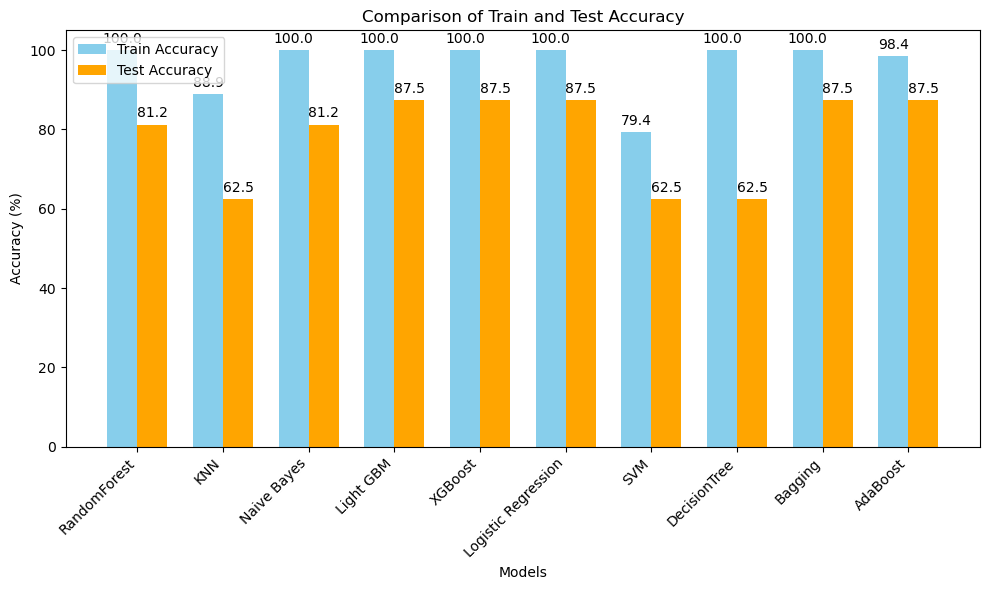

In [94]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ["RandomForest", "KNN", "Naive Bayes", "Light GBM", "XGBoost", 
          "Logistic Regression", "SVM", "DecisionTree", "Bagging", "AdaBoost"]

# Plot
x = np.arange(len(models))
width = 0.35  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))
train_bar = ax.bar(x - width/2, Train_Accuracy, width, label='Train Accuracy', color='skyblue')
test_bar = ax.bar(x + width/2, Test_Accuracy, width, label='Test Accuracy', color='orange')

# Add labels and titles
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Comparison of Train and Test Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

# Add value annotations
for bar in train_bar + test_bar:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()

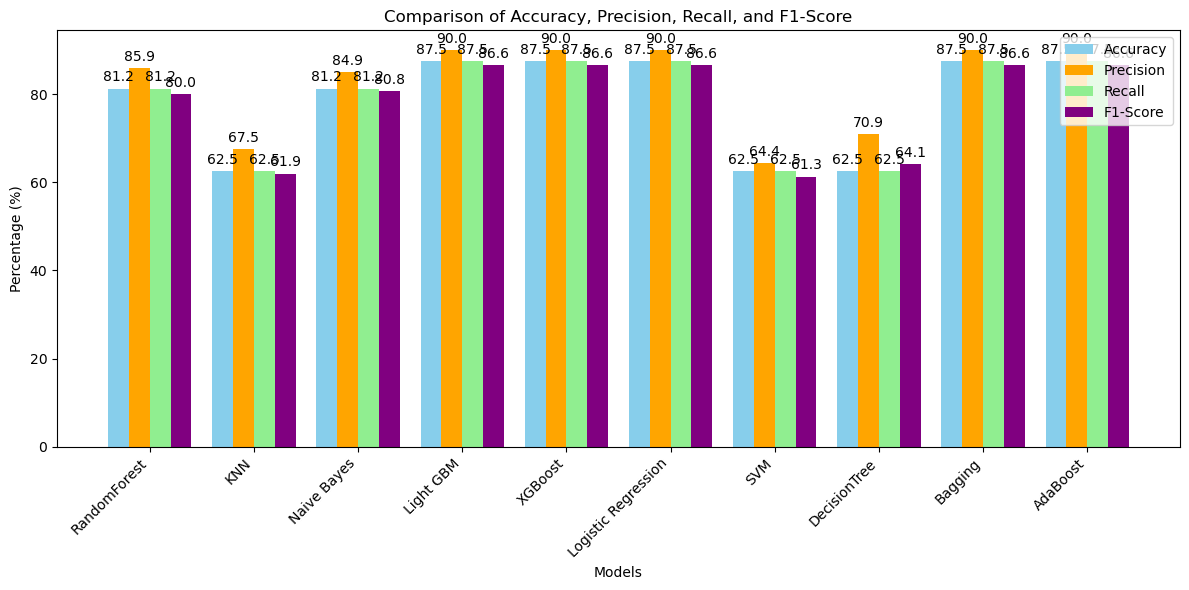

In [97]:
x = np.arange(len(models))
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(x - 1.5 * width, Test_Accuracy, width, label='Accuracy', color='skyblue')
bar2 = ax.bar(x - 0.5 * width, Precision, width, label='Precision', color='orange')
bar3 = ax.bar(x + 0.5 * width, Recall, width, label='Recall', color='lightgreen')
bar4 = ax.bar(x + 1.5 * width, F1, width, label='F1-Score', color='purple')

# Add labels and titles
ax.set_xlabel('Models')
ax.set_ylabel('Percentage (%)')
ax.set_title('Comparison of Accuracy, Precision, Recall, and F1-Score')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

# Add value annotations
for bar_group in [bar1, bar2, bar3, bar4]:
    for bar in bar_group:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [101]:
import pickle
filename = 'modelxgb.pkl'
pickle.dump(model_xgb,open(filename,'wb'))

# Save the fitted TF-IDF vectorizer
filename = 'vector.pkl'
pickle.dump(tf_vector, open(filename, 'wb'))

# Save the fitted LabelEncoder
filename = 'label_encoder.pkl'
pickle.dump(lb, open(filename, 'wb'))